In [4]:
import pandas as pd

In [5]:
merged_data=pd.read_csv('merged_data.csv')

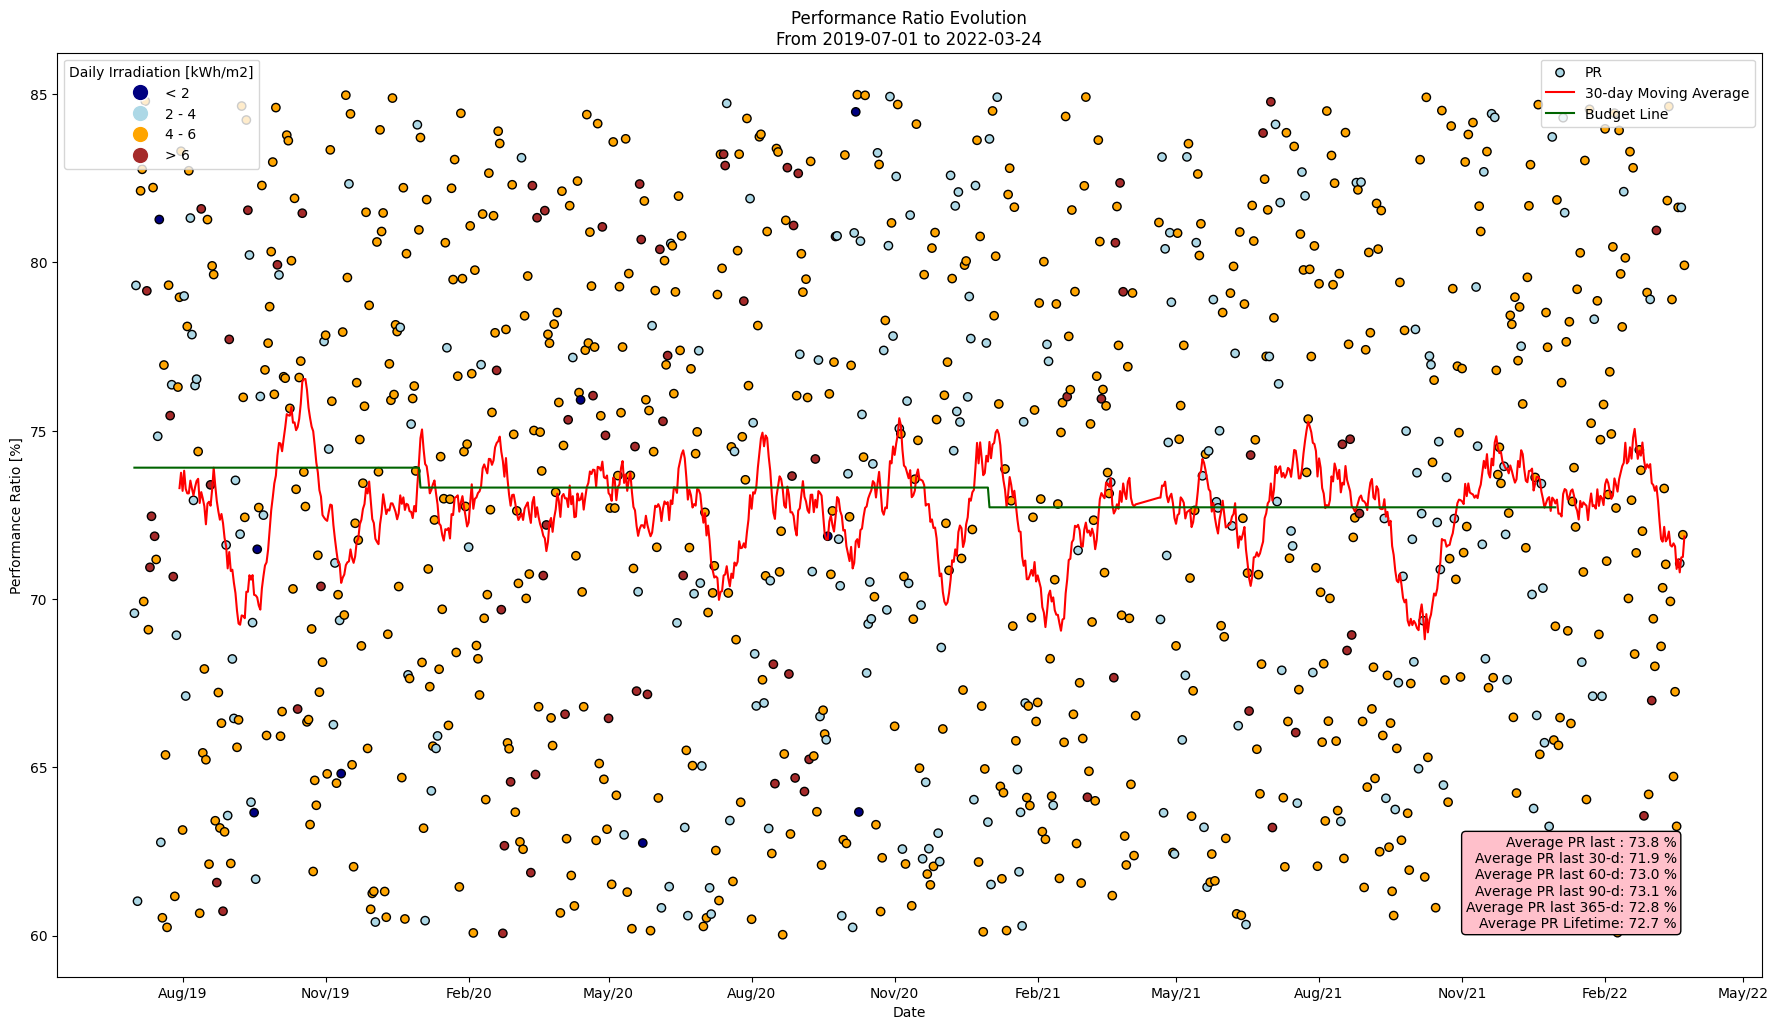

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

def generate_pr_graph(data):
    #'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    
    #  Calculating the 30-day moving average for PR
    data['PR_Movingavg30'] = data['PR'].rolling(window=30).mean()
    
    # Calculating the budget line dynamically
    data['Year'] = data['Date'].dt.year

    ## now let's create a dictionary to map the years by PR values start from 73.9
    budget_values = {2019: 73.9, 2020: 73.9*0.992, 2021: 73.9*0.992*0.992}
    data['Budget'] = data['Year'].map(budget_values)
    
    # Color coding for scatter points based on GHI values
    def get_color(ghi):
        if ghi < 2:
            return 'navy'
        elif 2 <= ghi < 4:
            return 'lightblue'
        elif 4 <= ghi < 6:
            return 'orange'
        else:
            return 'brown'
    
    data['Color'] = data['GHI'].apply(get_color)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(22, 12))
    
    # Scatter plot of PR with color-coded GHI values
    scatter = ax.scatter(data['Date'], data['PR'], c=data['Color'], edgecolor='k', label='PR')
    
    # Plot for 30-day moving average line
    ax.plot(data['Date'], data['PR_Movingavg30'], color='red', label='30-day Moving Average')
    
    # Plot for the budget line
    ax.plot(data['Date'], data['Budget'], color='darkgreen', linestyle='-', label='Budget Line')
    
    # Adding legend for GHI color coding
    labels = ['< 2', '2 - 4', '4 - 6', '> 6']
    colors = ['navy', 'lightblue', 'orange', 'brown']
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=12) for color in colors]
    legend1 = ax.legend(handles, labels, title="Daily Irradiation [kWh/m2]", loc='upper left')
    ax.add_artist(legend1)
    
    # Add legend for lines
    ax.legend(loc='upper right')
    
    # Set title and labels
    ax.set_title('Performance Ratio Evolution\nFrom 2019-07-01 to 2022-03-24')
    ax.set_xlabel('Date')
    ax.set_ylabel('Performance Ratio [%]')
    
    # Formatting date axis
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%y'))
    
    # Adding text box with average PR calculations
    avg_pr_7d = data['PR'].tail(7).mean()
    avg_pr_30d = data['PR'].tail(30).mean()
    avg_pr_60d = data['PR'].tail(60).mean()
    avg_pr_90d = data['PR'].tail(90).mean()
    avg_pr_365d = data['PR'].tail(365).mean()
    avg_pr_lifetime = data['PR'].mean()
    
    textstr = '\n'.join((
        f"Average PR last : {avg_pr_7d:.1f} %",
        f"Average PR last 30-d: {avg_pr_30d:.1f} %",
        f"Average PR last 60-d: {avg_pr_60d:.1f} %",
        f"Average PR last 90-d: {avg_pr_90d:.1f} %",
        f"Average PR last 365-d: {avg_pr_365d:.1f} %",
        f"Average PR Lifetime: {avg_pr_lifetime:.1f} %"
    ))
    
    # Text box on the graph
    props = dict(boxstyle='round', facecolor='pink', alpha=1)
    ax.text(0.95, 0.05, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='bottom', horizontalalignment='right', bbox=props)

    plt.show()

generate_pr_graph(merged_data)